### MALE FEMALE BIASES CALCULATION


In [1]:
import sys 
sys.path.append('..')

import json
import glob
import traceback
from gensim.models import KeyedVectors
from calculate_distance import CalculateDistance
from calculate_bias import calculate_bias_for_all_embedding
from utils import populate_b2e_dict_for_words, change_label_to_english_at_association
from plot_utils import get_association_subplot, get_bias_plot, get_correlation_heatmap

#CHANGE BELOW TWO LINE WITH
from word_sets_european_languages_staford_standards import european_language_word_list
MODEL_DIR = '../../word_embeddings/european_ln_word_vectors/fasttext/'

### load male, female & professional occupation wordlist

In [ ]:
def remove_common_words_in_reference_group(group_1, group_2):
    group_1 = list(set(group_1))
    group_2 = list(set(group_2))
    for index_1, word_1 in enumerate(group_1):
        for index_2, word_2 in enumerate(group_2):
            if word_1 == word_2:
                group_1.pop(index_1)
                group_2.pop(index_2)
                break
    return group_1, group_2

def calculate_distance_class_instance(lang):
    
    PROFESSIONAL_OCCUPATIONS = european_language_word_list[lang]['pr_occupations']
    PROFESSIONAL_OCCUPATIONS_ENGLISH = european_language_word_list['en']['pr_occupations']
    MALE_WORDS = european_language_word_list[lang]['male_words']
    FEMALE_WORDS = european_language_word_list[lang]['female_words']
    
    PROFESSIONAL_OCCUPATIONS = [word.strip() for word in PROFESSIONAL_OCCUPATIONS]
    MALE_WORDS = [word.strip() for word in MALE_WORDS]
    FEMALE_WORDS = [word.strip() for word in FEMALE_WORDS]
    
    MALE_WORDS, FEMALE_WORDS = remove_common_words_in_reference_group(MALE_WORDS, FEMALE_WORDS)
    
    target_groups = [PROFESSIONAL_OCCUPATIONS]
    target_group_labels = ['professional_occupation']

    reference_groups = [MALE_WORDS, FEMALE_WORDS]
    reference_group_labels = ['male', 'female']
    
    
    print('target group -->')
    for group, labels in zip(target_groups, target_group_labels):
        print(labels, group)
        print('\n')
    
    print('\n')

    print('reference group -->')
    for group, labels in zip(reference_groups, reference_group_labels):
        print(labels, group)
        print('\n')
    
    
    
    calculate_association_distance = CalculateDistance()
    calculate_association_distance.set_target_word_groups(target_word_groups=target_groups, target_group_labels=target_group_labels)
    calculate_association_distance.set_reference_word_groups(reference_word_groups=reference_groups, reference_group_labels=reference_group_labels)
    
    b2e_dict = populate_b2e_dict_for_words(PROFESSIONAL_OCCUPATIONS, PROFESSIONAL_OCCUPATIONS_ENGLISH)
    
    return calculate_association_distance, b2e_dict

### Calculate associations

target group -->
professional_occupation ['Hausmeister', 'Statistiker', 'Hebamme', 'Gerichtsvollzieher', 'Auktionator', 'Fotograf', 'Geologe', 'Schuhmacher', 'Athlet', 'Kassierer', 'Tänzer', 'Haushälterin', 'Buchhalter', 'Physiker', 'Gärtner', 'Zahnarzt', 'Weber', 'Schmied', 'Psychologe', 'Vorgesetzter', 'Mathematiker', 'Vermesser', 'Schneider', 'Designer', 'Ökonom', 'Mechaniker', 'Arbeiter', 'Postmeister', 'Makler', 'Chemiker', 'Bibliothekar', 'Begleiter', 'Büroangestellter', 'Musiker', 'Portier', 'Wissenschaftler', 'Zimmermann', 'Seemann', 'Ausbilder', 'Sheriff', 'Pilot', 'Inspektor', 'Maurer', 'Bäcker', 'Administrator', 'Architekt', 'Sammler', 'Bediener', 'Chirurg', 'Fahrer', 'Maler', 'Dirigent', 'Krankenschwester', 'Koch', 'Ingenieur', 'Rentner', 'Verkäufer', 'Anwalt', 'Geistlicher', 'Arzt', 'Bauer', 'Angestellter', 'Manager', 'Wache', 'Künstler', 'Schmied', 'Beamter', 'Polizei', 'Arzt', 'Professor', 'Student', 'Richter', 'Lehrer', 'Autor', 'Sekretär', 'Soldat']




reference group

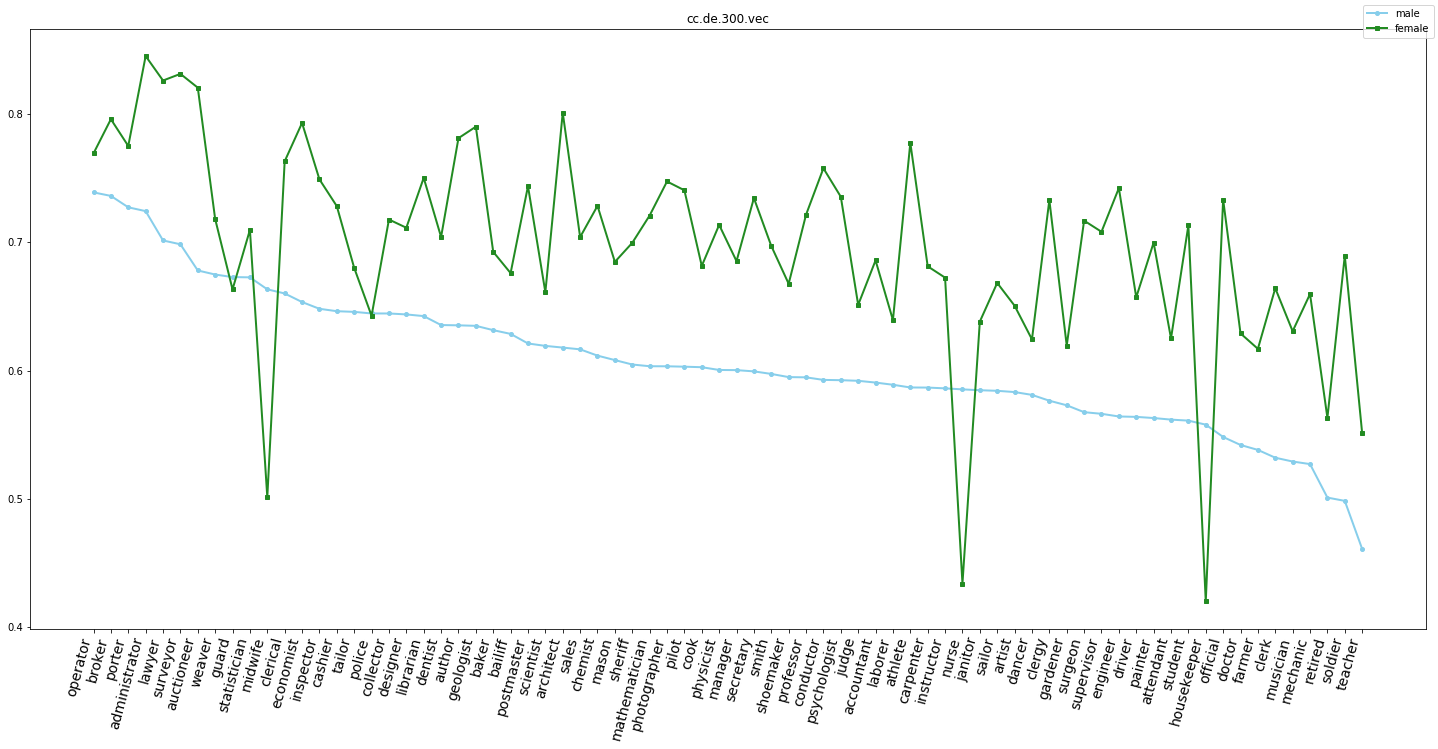

total 0 missing words for this embedding set()



target group -->
professional_occupation ['janitor', 'statistician', 'midwife', 'bailiff', 'auctioneer', 'photographer', 'geologist', 'shoemaker', 'athlete', 'cashier', 'dancer', 'housekeeper', 'accountant', 'physicist', 'gardener', 'dentist', 'weaver', 'blacksmith', 'psychologist', 'supervisor', 'mathematician', 'surveyor', 'tailor', 'designer', 'economist', 'mechanic', 'laborer', 'postmaster', 'broker', 'chemist', 'librarian', 'attendant', 'clerical', 'musician', 'porter', 'scientist', 'carpenter', 'sailor', 'instructor', 'sheriff', 'pilot', 'inspector', 'mason', 'baker', 'administrator', 'architect', 'collector', 'operator', 'surgeon', 'driver', 'painter', 'conductor', 'nurse', 'cook', 'engineer', 'retired', 'sales', 'lawyer', 'clergy', 'physician', 'farmer', 'clerk', 'manager', 'guard', 'artist', 'smith', 'official', 'police', 'doctor', 'professor', 'student', 'judge', 'teacher', 'author', 'secretary', 'soldier']




reference group

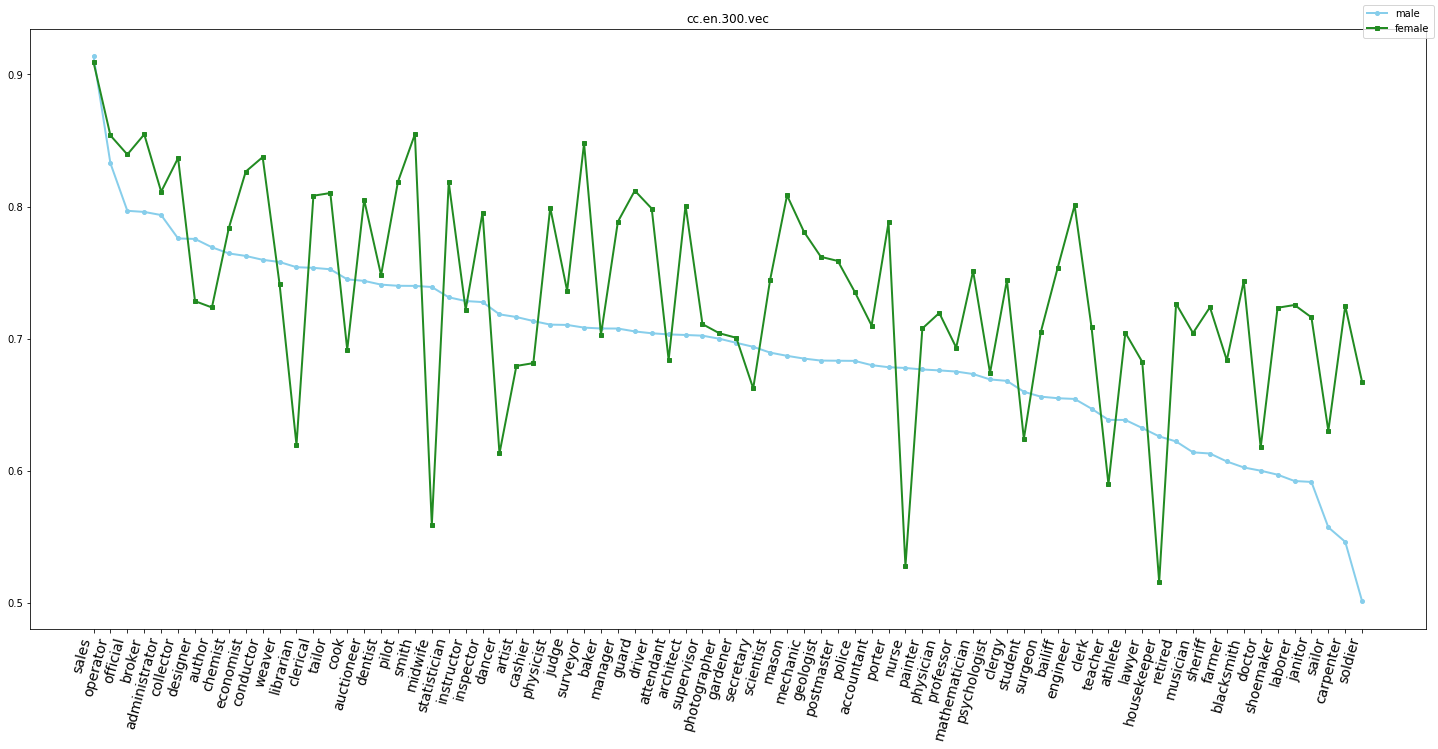

total 1 missing words for this embedding {'femen'}



target group -->
professional_occupation ['conserje', 'estadístico', 'comadrona', 'Ballif', 'subastador', 'fotógrafo', 'geólogo', 'zapatero', 'atleta', 'cajero', 'bailarín', 'ama de casa', 'contador', 'físico', 'jardinero', 'dentista', 'tejedor', 'herrero', 'psicólogo', 'supervisor', 'matemático', 'agrimensor', 'sastre', 'diseñador', 'economista', 'mecánico', 'trabajador', 'estafetero', 'corredor', 'químico', 'bibliotecario', 'asistente', 'clerical', 'músico', 'portero', 'científico', 'carpintero', 'marinero', 'instructor', 'sheriff', 'piloto', 'inspector', 'albañil', 'panadero', 'administrador', 'arquitecto', 'coleccionista', 'operador', 'cirujano', 'conductor', 'pintor', 'conductor', 'enfermero', 'cocinero', 'ingeniero', 'retirado', 'ventas', 'abogado', 'clero', 'médico', 'agricultor', 'empleado', 'gerente', 'guardia', 'artista', 'herrero', 'oficial', 'policía', 'médico', 'profesor', 'estudiante', 'juez', 'maître', 'autor', 'secre

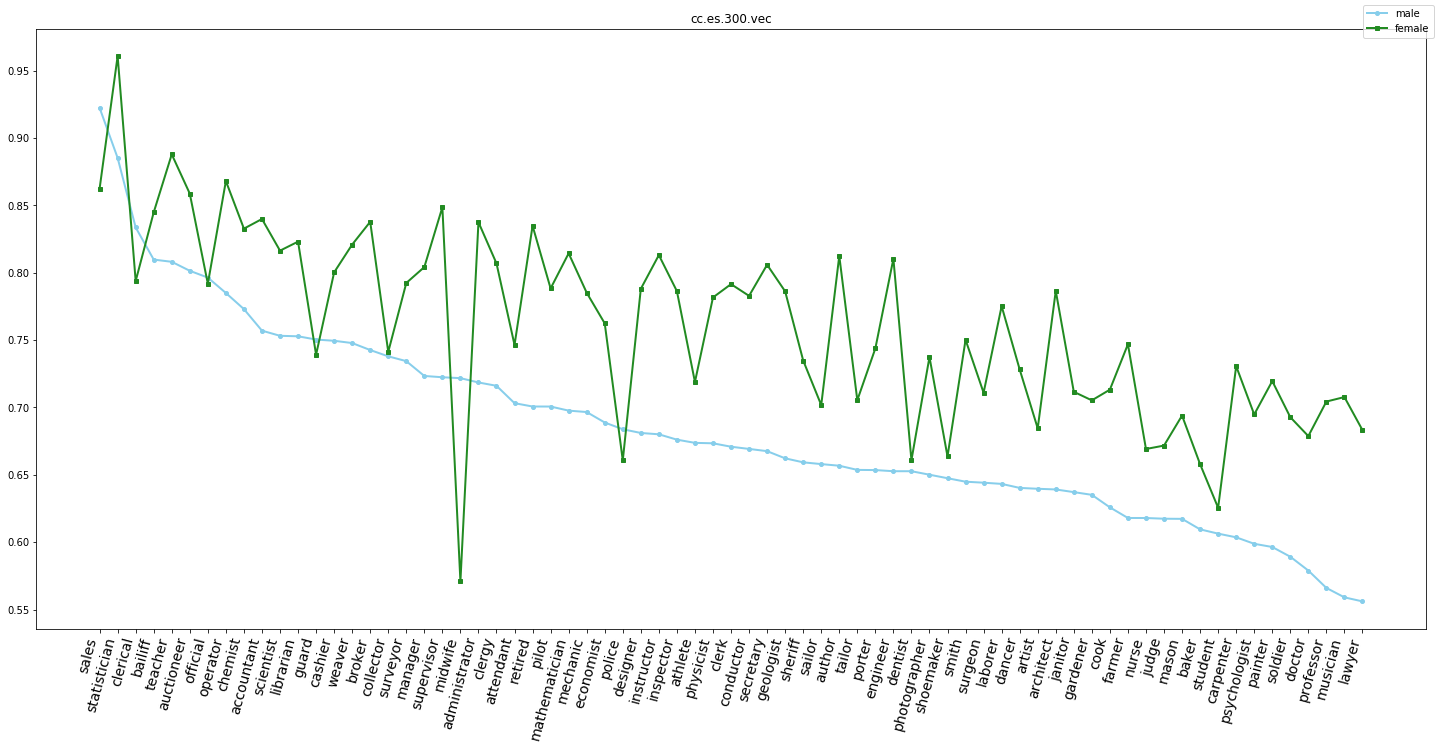

total 4 missing words for this embedding {'ama de casa', 'ella misma', 'él mismo', 'estafetero'}



target group -->
professional_occupation ['concierge', 'statisticien', 'sage-femme', 'huissier', 'commissaire-priseur', 'photographe', 'géologue', 'cordonnier', 'athlète', 'caissier', 'danseur', 'servante', 'comptable', 'physicien', 'jardinier', 'dentiste', 'tisserand', 'forgeron', 'psychologue', 'superviseur', 'mathématicien', 'arpenteur', 'tailleur', 'concepteur', 'économiste', 'mécanicien', 'ouvrier', 'maître de poste', 'courtier', 'chimiste', 'bibliothécaire', 'préposé', 'fonctionnaire', 'musicien', 'porter', 'scientifique', 'charpentier', 'marin', 'instructeur', 'shérif', 'pilote', 'inspecteur', 'maçon', 'boulanger', 'administrateur', 'architecte', 'collectionneur', 'opérateur', 'chirurgien', 'chauffeur', 'peintre', 'conducteur', 'infirmier', 'cuisinier', 'ingénieur', 'retraité', 'vente', 'avocat', 'clergé', 'médecin', 'agriculteur', 'commis', 'gestionnaire', 'garde', 'artiste', 'fo

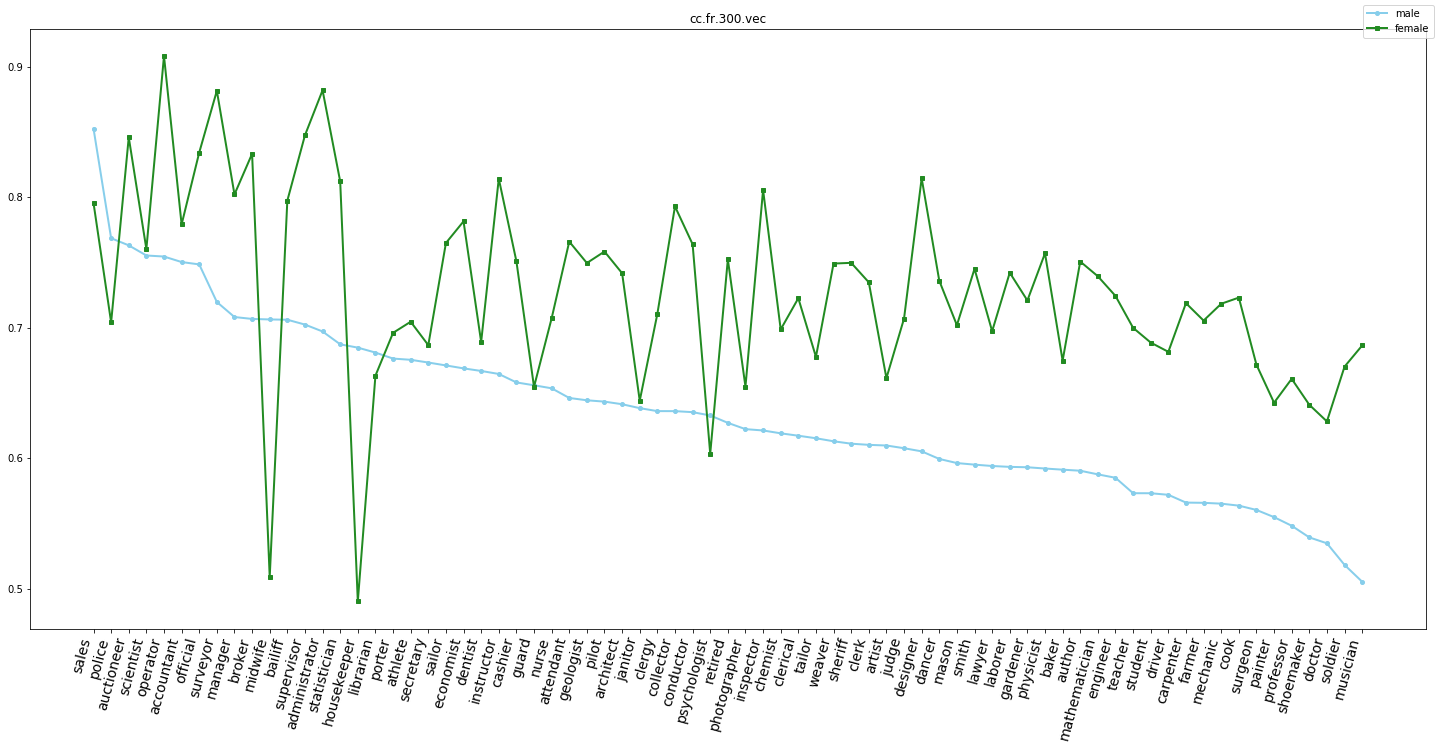

total 1 missing words for this embedding {'maître de poste'}



target group -->
professional_occupation ['bidello', 'statistico', 'ostetrica', 'amministratore', 'banditore', 'fotografo', 'geologo', 'calzolaio', 'atleta', 'cassiere', 'ballerino', 'governante', 'contabile', 'fisico', 'giardiniere', 'dentista', 'tessitore', 'fabbro', 'psicologo', 'supervisore', 'matematico', 'geometra', 'sarto', 'designer', 'economista', 'meccanico', 'operaio', 'postmaster', 'broker', 'chimico', 'bibliotecario', 'assistente', 'clericale', 'musicista', 'portiere', 'scienziato', 'carpentiere', 'marinaio', 'istruttore', 'sceriffo', 'pilota', 'ispettore', 'muratore', 'fornaio', 'amministratore', 'architetto', 'collezionista', 'operatore', 'chirurgo', 'autista', 'pittore', 'direttore', 'infermiere', 'cuoco', 'ingegnere', 'pensionato', 'vendite', 'avvocato', 'clero', 'medico', 'agricoltore', 'impiegato', 'direttore', 'guardia', 'artista', 'fabbro', 'ufficiale', 'polizia', 'medico', 'professore', 'studente', 'g

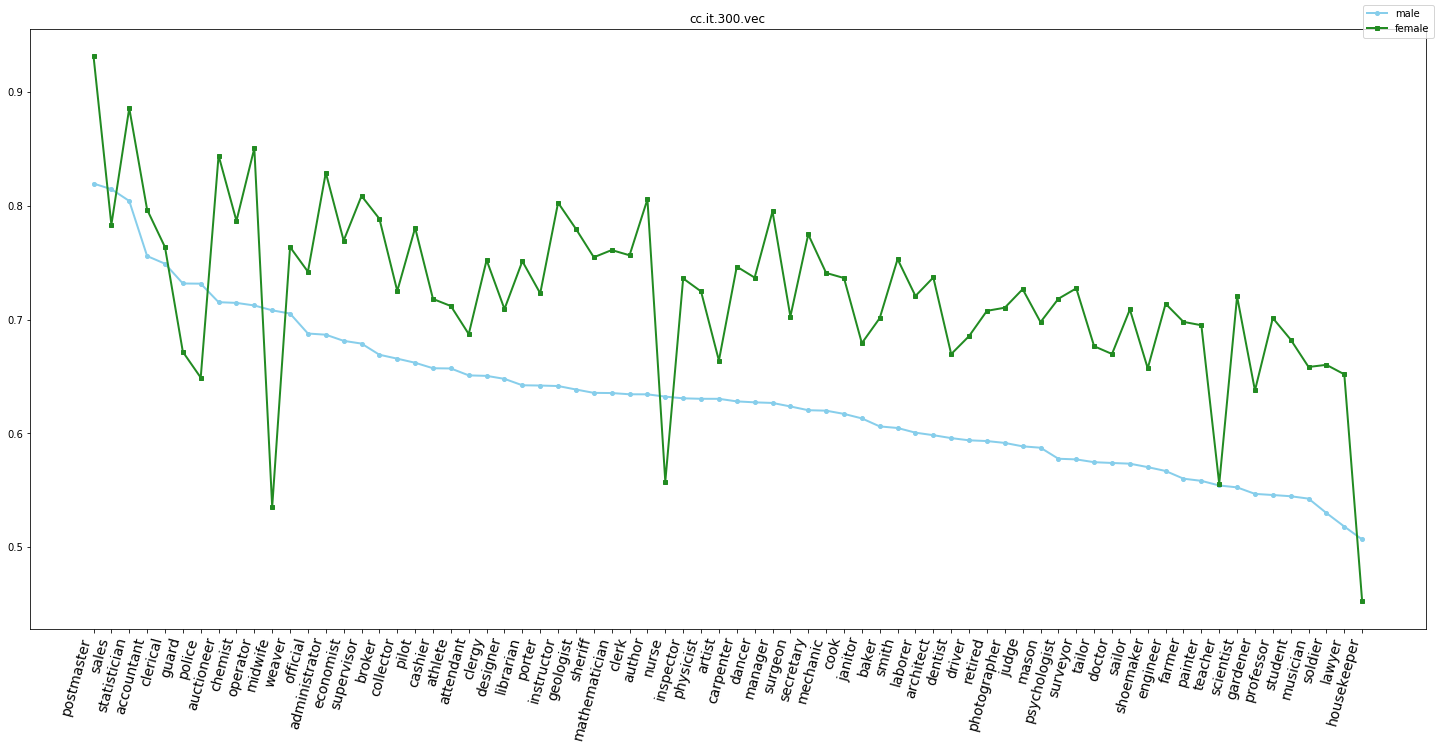

total 1 missing words for this embedding {'se stesso'}



target group -->
professional_occupation ['уборщик', 'статистика', 'акушерка', 'бейлиф', 'аукционист', 'фотограф', 'геолог', 'сапожник', 'спортсмен', 'кассир', 'танцор', 'экономка', 'бухгалтер', 'физик', 'садовник', 'стоматолог', 'ткач', 'кузнец', 'психолог', 'супервайзер', 'математик', 'инспектор', 'портной', 'дизайнер', 'экономист', 'механик', 'рабочий', 'почтмейстер', 'брокер', 'химик', 'библиотекарь', 'служитель', 'канцелярский', 'музыкант', 'портер', 'ученый', 'плотник', 'моряк', 'инструктор', 'шериф', 'пилот', 'инспектор', 'каменщик', 'пекарь', 'администратор', 'архитектор', 'коллекционер', 'оператор', 'хирург', 'водитель', 'художник', 'проводник', 'медсестра', 'повар', 'инженер', 'отставной', 'продажи', 'юрист', 'духовенство', 'врач', 'фермер', 'клерк', 'менеджер', 'охрана', 'художник', 'кузнец', 'чиновник', 'полиция', 'доктор', 'профессор', 'студент', 'судья', 'учитель', 'автор', 'секретарь', 'солдат']




reference grou

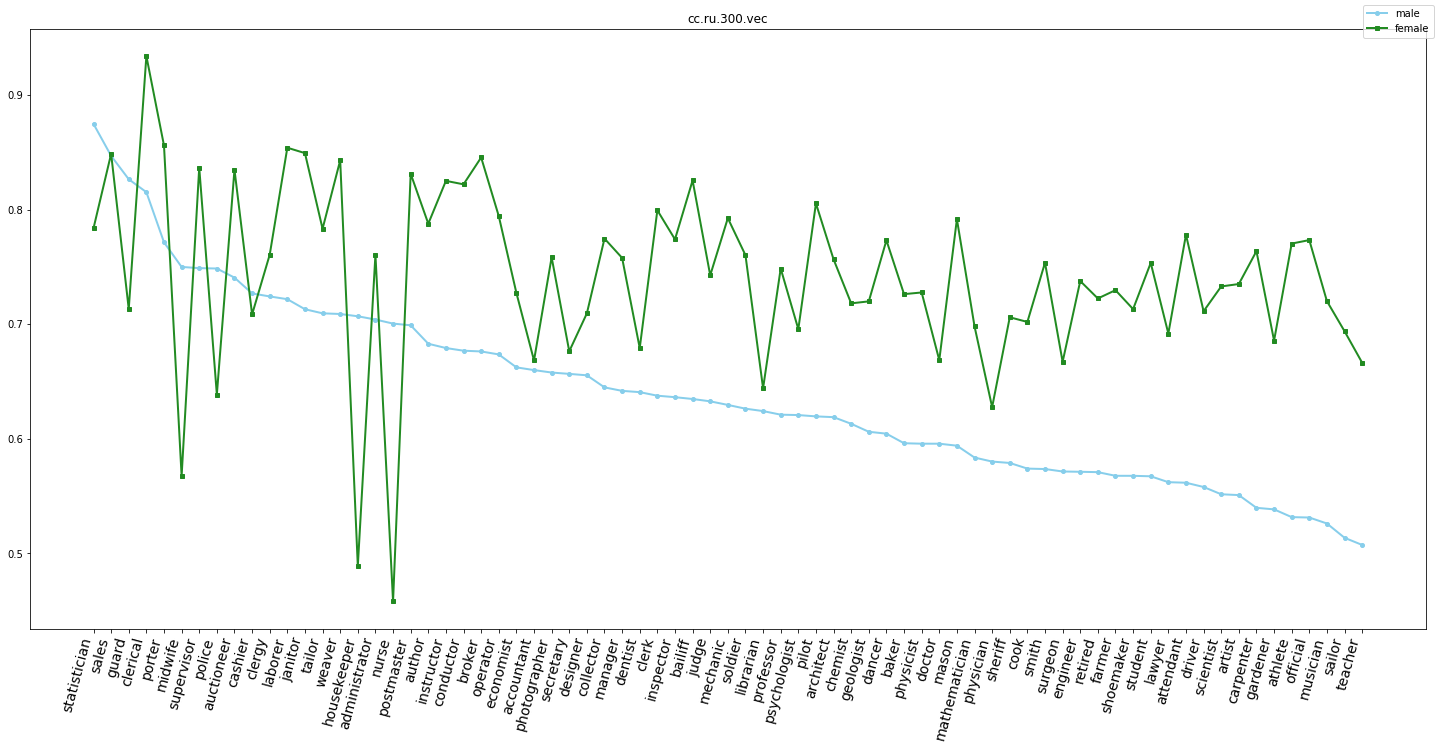

total 0 missing words for this embedding set()



target group -->
professional_occupation ['hademe', 'istatistikçi', 'ebe', 'mübaşir', 'müzayede', 'fotoğrafçı', 'jeolog', 'kunduracı', 'atlet', 'kasiyer', 'dansçı', 'hizmetçi', 'muhasebeci', 'fizikçi', 'bahçıvan', 'dişçi', 'dokumacı', 'demirci', 'psikolog', 'danışman', 'matematikçi', 'sörveyör', 'terzi', 'tasarımcı', 'ekonomist', 'mekanik', 'işçi', 'postmaster', 'broker', 'kimyacı', 'kütüphaneci', 'görevli', 'büro', 'müzisyen', 'bekçi', 'bilgin', 'marangoz', 'denizci', 'eğitmen', 'şerif', 'pilot', 'müfettiş', 'mason', 'fırıncı', 'yönetici', 'mimar', 'toplayıcı', 'operatör', 'cerrah', 'sürücü', 'ressam', 'kılavuz', 'hemşire', 'aşçı', 'mühendis', 'emekli', 'satış', 'avukat', 'papaz', 'doktor', 'çiftçi', 'katip', 'yönetici', 'bekçi', 'sanatçı', 'smith', 'resmi', 'polis', 'doktor', 'profesör', 'öğrenci', 'yargıç', 'öğretmen', 'yazar', 'sekreter', 'asker']




reference group -->
male ['erkekler', 'oğlan', 'kendisi', 'adam', 'erkek', 'amca',

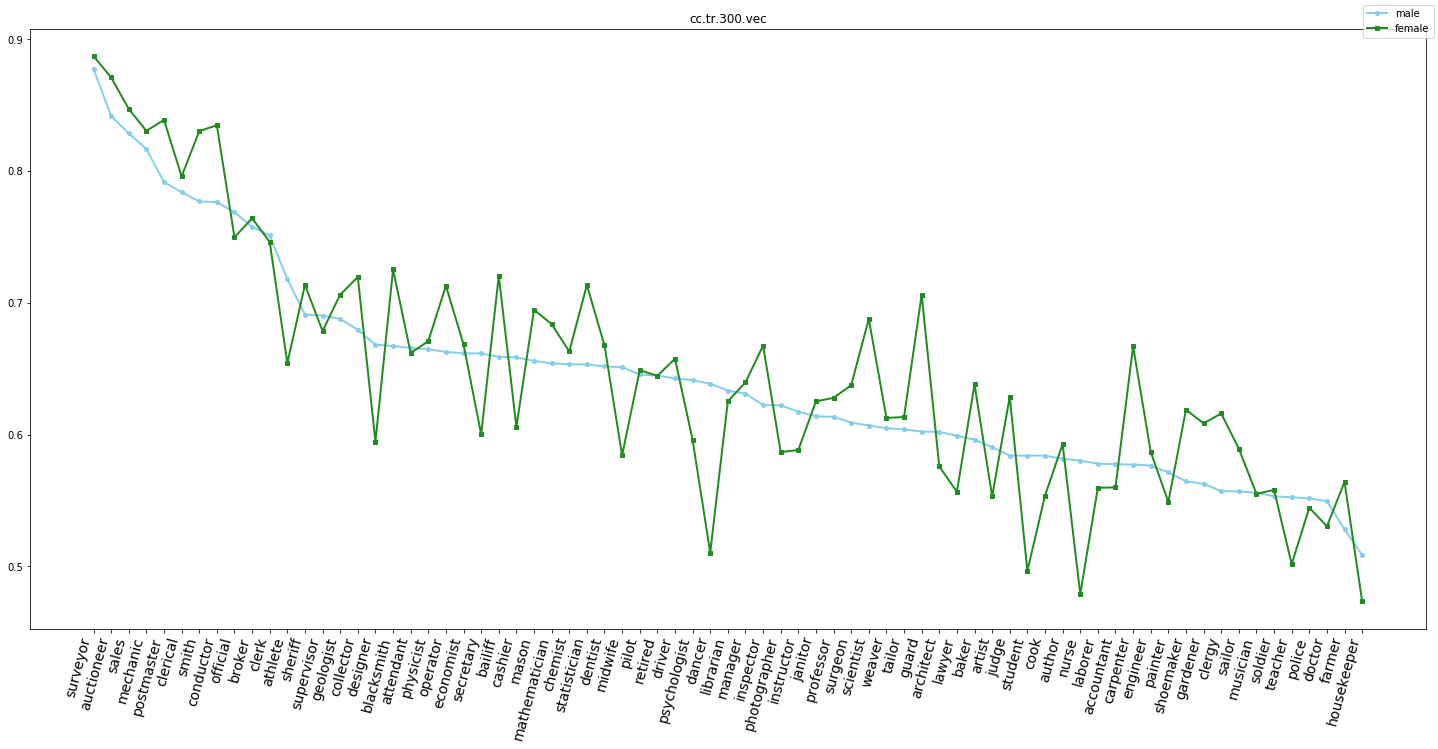

total 0 missing words for this embedding set()





In [ ]:
association_dict = {}
model_dir = MODEL_DIR
filenames = glob.glob(model_dir + '*')
# print(filenames)
for filename in filenames:
    embedding_name = filename.split('/')[-1]
    lang_name = embedding_name.split('.')[1]
    calculate_association_distance, b2e_dict = calculate_distance_class_instance(lang_name)
    target_wise_association_for_this_paper = {}
    if embedding_name.split('.')[-1] == 'bin':
        model = KeyedVectors.load_word2vec_format(filename, binary=True)
    else:
        model = KeyedVectors.load_word2vec_format(filename, binary=False)
    target_wise_association_for_this_embedding, missing_words = calculate_association_distance.get_association_for_provided_embedding(model=model)
    
    
    
    target_wise_association_for_this_embedding = change_label_to_english_at_association(target_wise_association_for_this_embedding, b2e_dict)
    association_dict[embedding_name] = target_wise_association_for_this_embedding
    
    
    get_association_subplot(target_wise_association_for_this_paper=target_wise_association_for_this_embedding, b2e_dict = b2e_dict, title= embedding_name)
    
    print('total {} missing words for this embedding {}'.format(len(missing_words), missing_words))
    print('\n' * 2)


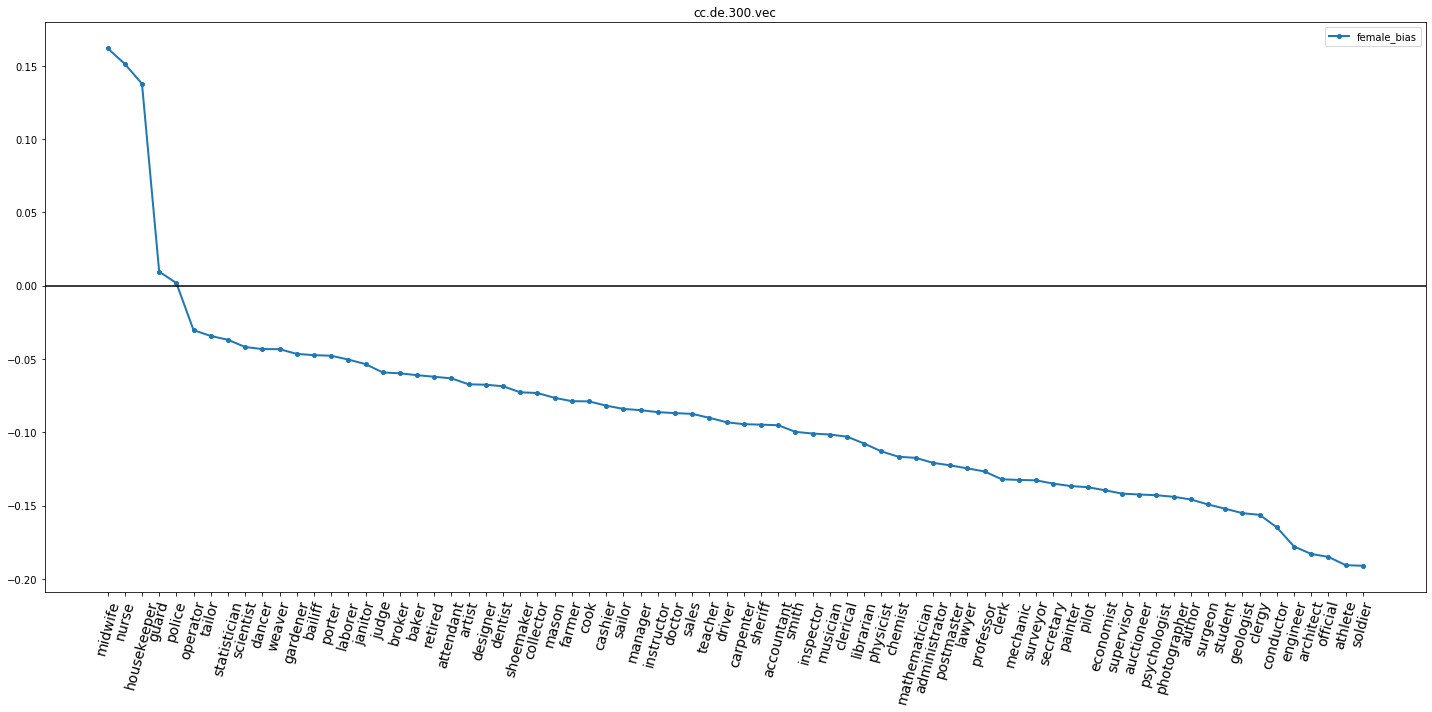

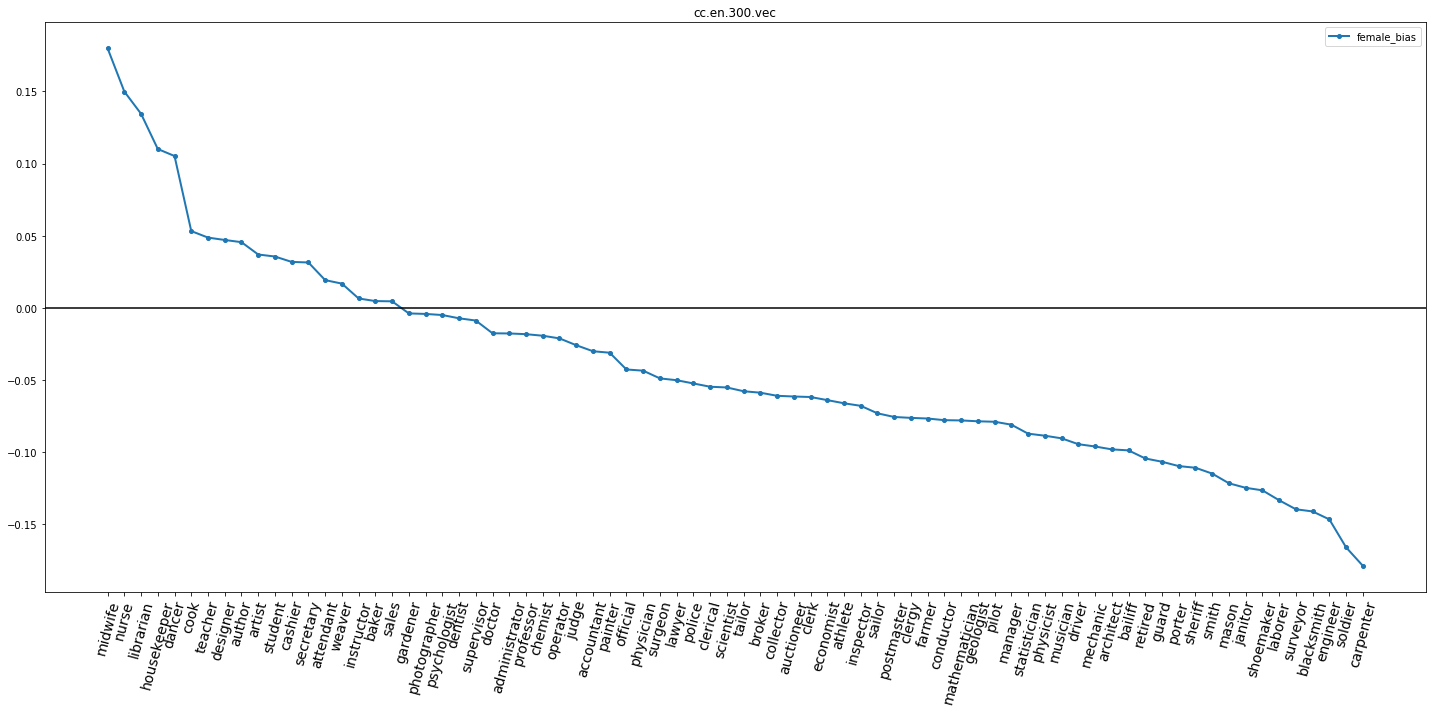

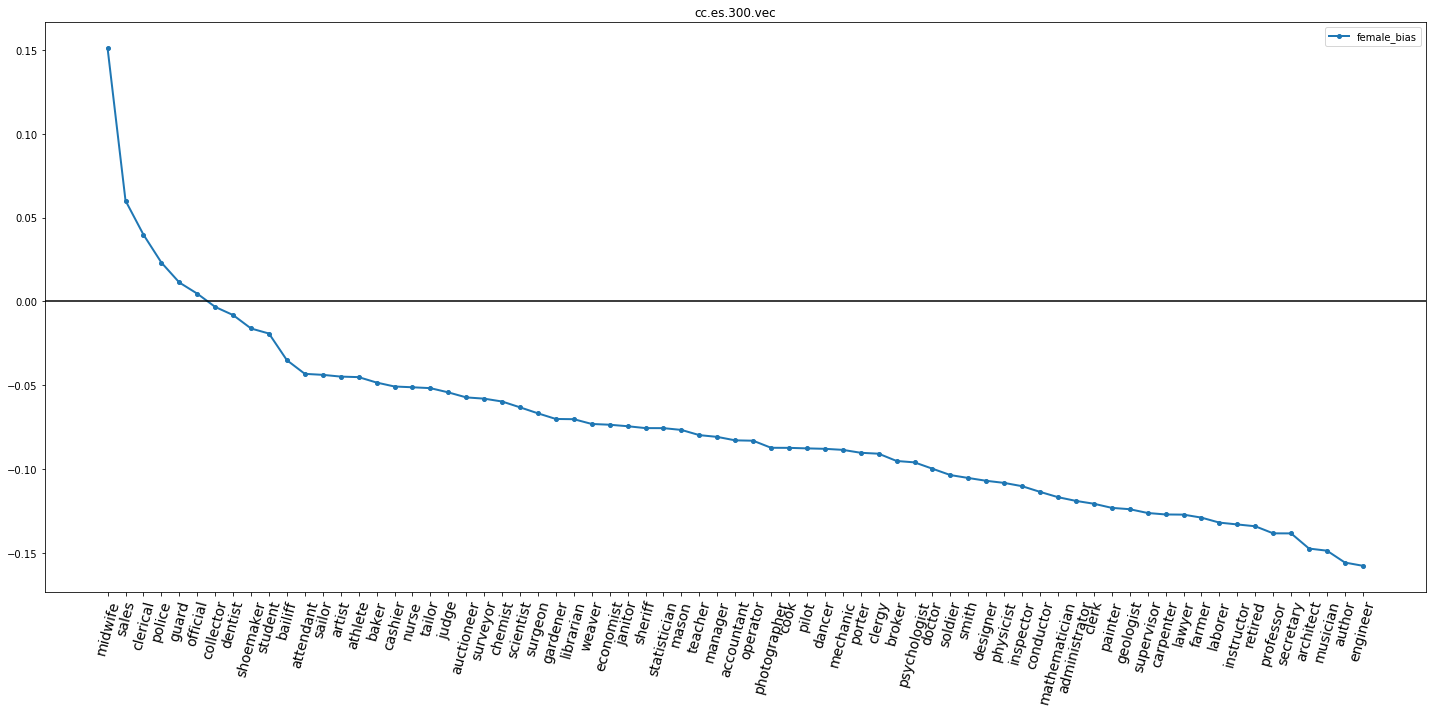

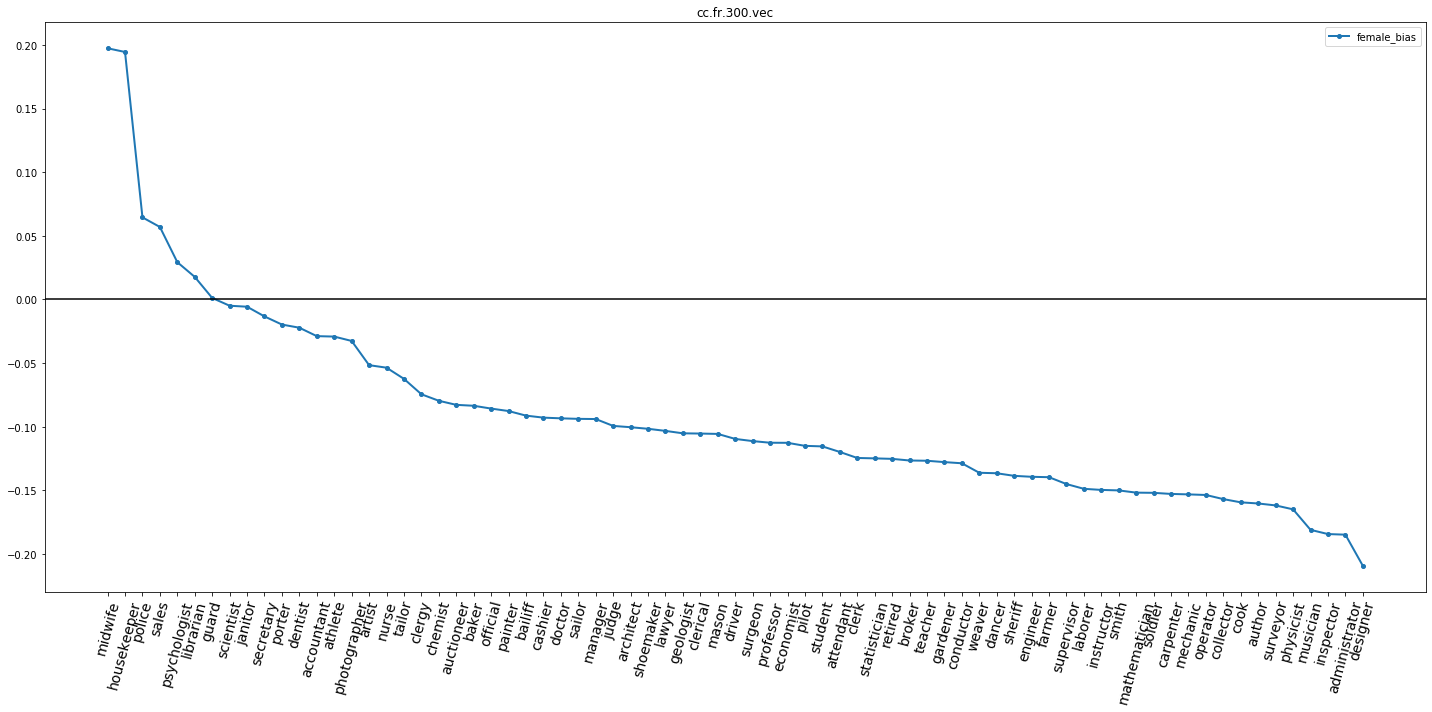

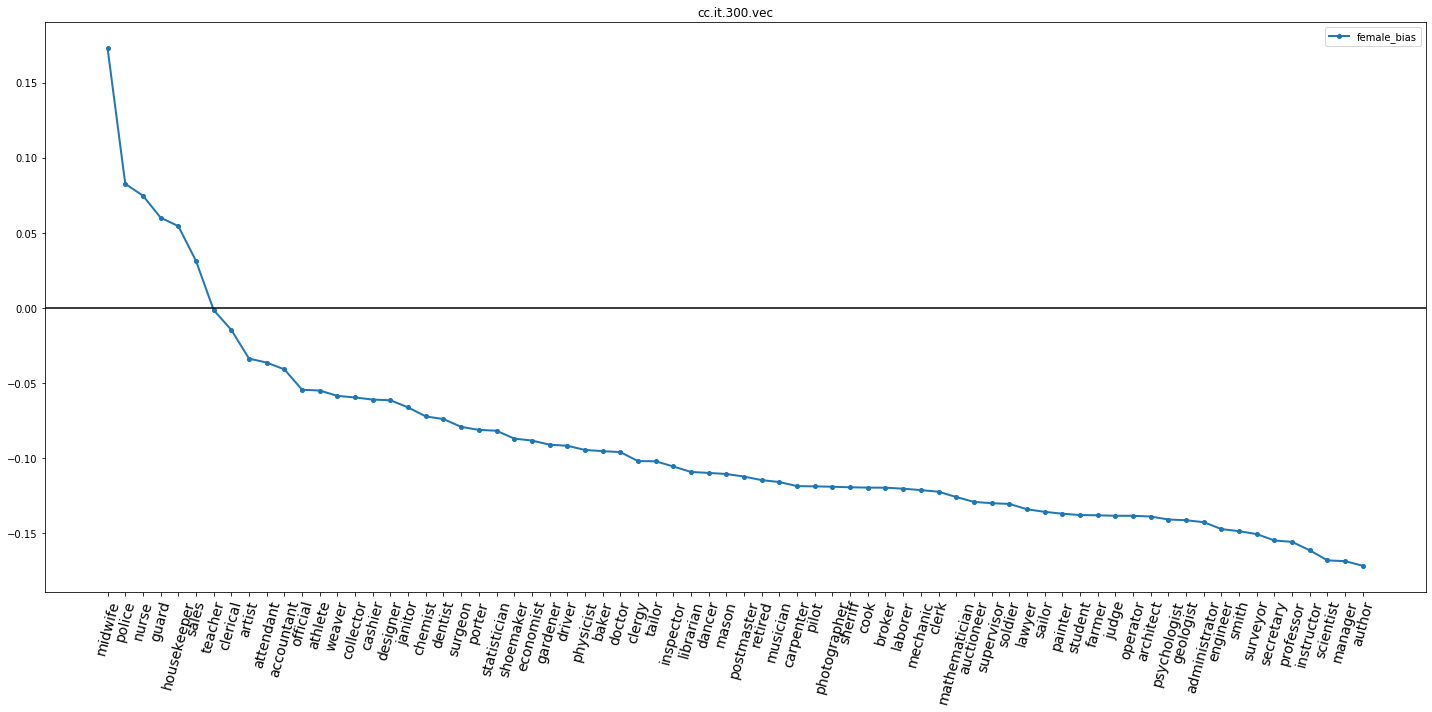

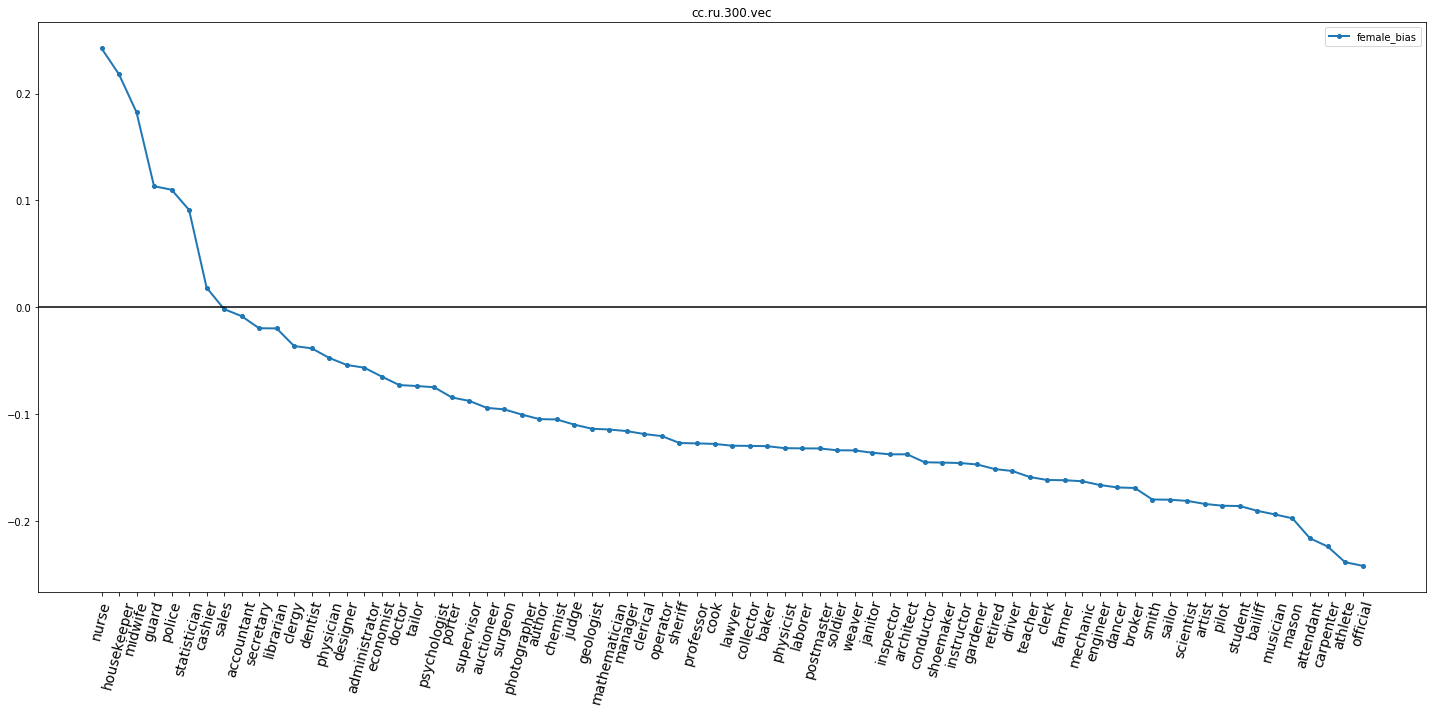

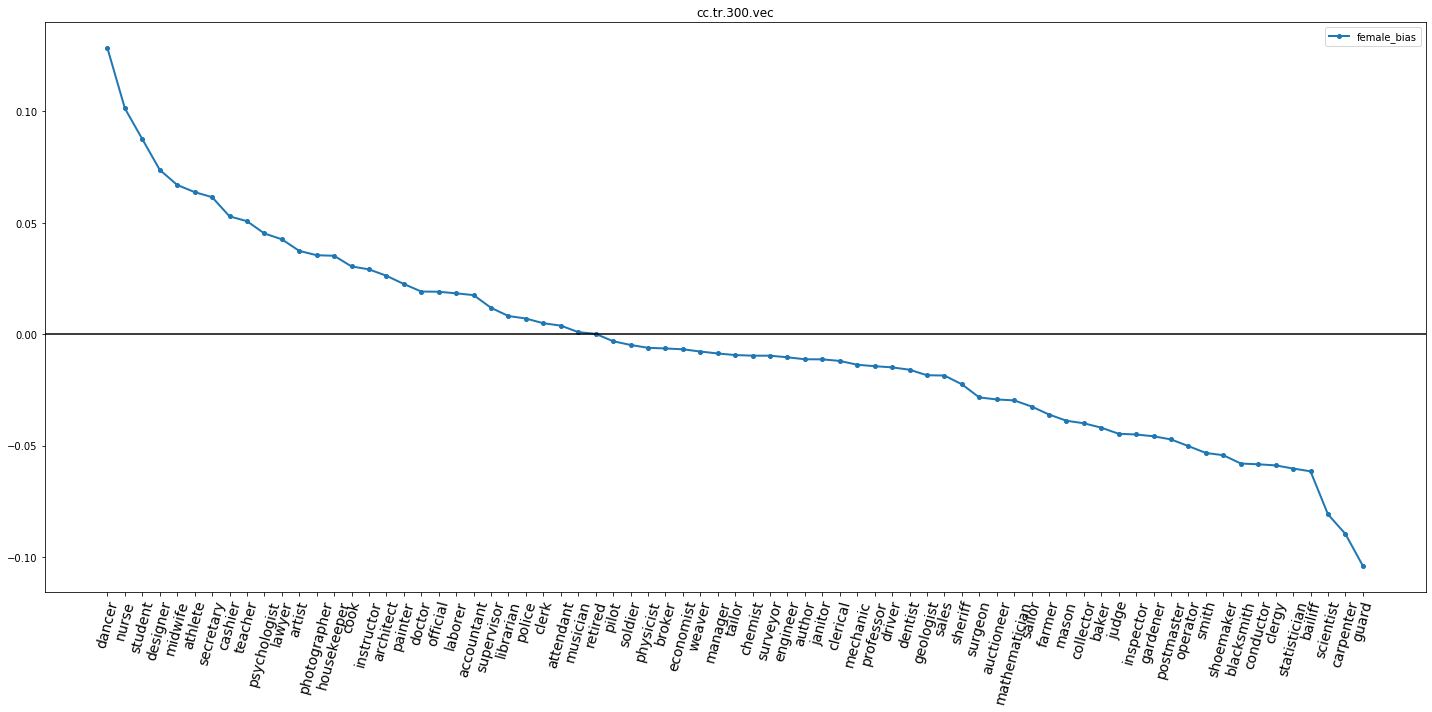

In [ ]:
from plot_utils import get_bias_plot
female_bias_dict_for_all_embeddings = calculate_bias_for_all_embedding(association_dict=association_dict, 
                                                                     target_label = 'professional_occupation', 
                                                                     reference_labels = ['male', 'female'])

get_bias_plot(bias_dict=female_bias_dict_for_all_embeddings, b2e_dict=b2e_dict, bias_label = 'female_bias')

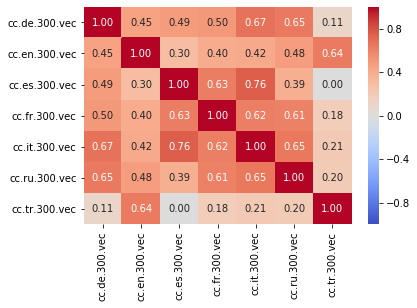

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(female_bias_dict_for_all_embeddings)
get_correlation_heatmap(df=df)


In [ ]:
print(df.corr())

               cc.de.300.vec  cc.en.300.vec  cc.es.300.vec  cc.fr.300.vec  \
cc.de.300.vec       1.000000       0.453968       0.487890       0.500261   
cc.en.300.vec       0.453968       1.000000       0.297033       0.401591   
cc.es.300.vec       0.487890       0.297033       1.000000       0.625082   
cc.fr.300.vec       0.500261       0.401591       0.625082       1.000000   
cc.it.300.vec       0.672812       0.419877       0.756130       0.621430   
cc.ru.300.vec       0.646064       0.478847       0.385024       0.612823   
cc.tr.300.vec       0.106522       0.635110       0.004677       0.181141   

               cc.it.300.vec  cc.ru.300.vec  cc.tr.300.vec  
cc.de.300.vec       0.672812       0.646064       0.106522  
cc.en.300.vec       0.419877       0.478847       0.635110  
cc.es.300.vec       0.756130       0.385024       0.004677  
cc.fr.300.vec       0.621430       0.612823       0.181141  
cc.it.300.vec       1.000000       0.651042       0.212006  
cc.ru.300.vec    